In [1]:
import os
import glob
import numpy as np
import pandas as pd

import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges', 'QC')

In [3]:
dir_input = os.path.join(dir_base, 'METADATA', 'METADATA_INTENSE_UPDATE.csv')
METADATA = pd.read_csv(dir_input)
METADATA.head(2)

,File,ISO,Region,Code,Name,Elevatn,Or_EPSG,CRS_E,CRS_N,Lat,Lon,Yr_Strt,Yer_End,INTENSE,AGENCY,Source,TimeZon
0,IT-210_PIE-001030-900_0060_QCv1.csv,IT-210,Piedmont,PIE-001030-900,BORGOFRANCODIVREA,337.0,32632,410005.0,5040731.0,45.514302,7.847798,1988-05-08 05:00:00,2024-09-09 01:00:00,DT,ARPA Piemonte,Piedmont,UTC
1,IT-210_PIE-001097-900_0060_QCv1.csv,IT-210,Piedmont,PIE-001097-900,CUMIANA,327.0,32632,373092.0,4980177.0,44.963696,7.390821,1988-01-29 03:00:00,2024-09-18 12:00:00,DT,ARPA Piemonte,Piedmont,UTC


In [4]:
dir_read = os.path.join(dir_base, 'data_1h')
directories = [d for d in os.listdir(dir_read) if os.path.isdir(os.path.join(dir_read, d))]

In [5]:
for nn in range(len(directories)):
    print(f'Directory: {directories[nn]}')
    dir_tmp = os.path.join(dir_base,'DATA_1dy','data',directories[nn])
    # dir_tmp = os.path.join(dir_base,'DATA_1h',directories[nn])
    if not os.path.exists(dir_tmp):
        os.makedirs(dir_tmp)
        print(f"Directory created: {dir_tmp}")

Directory: IT-210
Directory: IT-230
Directory: IT-250
Directory: IT-321
Directory: IT-322
Directory: IT-340
Directory: IT-360
Directory: IT-420
Directory: IT-450
Directory: IT-520
Directory: IT-550
Directory: IT-570
Directory: IT-620
Directory: IT-670
Directory: IT-720
Directory: IT-750
Directory: IT-770
Directory: IT-780
Directory: IT-820
Directory: IT-880


In [ ]:
for nn in range(len(directories)):#len(directories)
    META_REGION = METADATA[METADATA['ISO'] == directories[nn]].reset_index(inplace=False)
    print(f'Region: {directories[nn]}')

    for ss in range(len(META_REGION)):#len(META_REGION)

        print(f'Station: {META_REGION['File'][ss]}')
        data = pd.read_csv(os.path.join(dir_base,'DATA_1h',directories[nn],META_REGION['File'][ss]))

        data["QCv1_Flag1"] = np.where(data["QCv1_Flag1"] == 0, data["Prec_h"], np.nan)
        data["QCv1_Flag_Rec"] = np.where(data["QCv1_Flag_Rec"] == 0, data["Prec_h"], np.nan)

        data['Datetime_h'] = pd.to_datetime(data['Datetime_h'])
        data.set_index('Datetime_h', inplace=True)
        
        # Daily accumulation
        dir_out = os.path.join(dir_base,'data_1dy','data',directories[nn],META_REGION['File'][ss])
        data_pre = data['Prec_h'].resample('1d').sum()
        data_preQC = data['QCv1_Flag1'].resample('1d').sum()
        data_preQC_rec = data['QCv1_Flag_Rec'].resample('1d').sum()

        # # Hourly accumulation
        # data = data['Prec_h'].resample('1h').sum()
        # dir_out = os.path.join(dir_base,'DATA_1h',directories[nn],META_REGION['File'][ss])

        pre_1dy = pd.DataFrame({'Datetime':data_preQC.index, 'pre':data_pre.values, 'QCv1_Flag1':data_preQC.values, 'QCv1_Flag_Rec':data_preQC_rec.values})
        pre_1dy.to_csv(dir_out, header=True, index=False)

Region: IT-322
Station: IT-322_AA_0110_0060_QCv1.csv
Station: IT-322_AA_0220_0060_QCv1.csv
Station: IT-322_AA_0250_0060_QCv1.csv
Station: IT-322_AA_0310_0060_QCv1.csv
Station: IT-322_AA_0640_0060_QCv1.csv
Station: IT-322_AA_0820_0060_QCv1.csv
Station: IT-322_AA_0970_0060_QCv1.csv
Station: IT-322_AA_1140_0060_QCv1.csv
Station: IT-322_AA_1580_0060_QCv1.csv
Station: IT-322_AA_1930_0060_QCv1.csv
Station: IT-322_AA_2050_0060_QCv1.csv
Station: IT-322_AA_2090_0060_QCv1.csv
Station: IT-322_AA_2221_0060_QCv1.csv
Station: IT-322_AA_2320_0060_QCv1.csv
Station: IT-322_AA_2440_0060_QCv1.csv
Station: IT-322_AA_2590_0060_QCv1.csv
Station: IT-322_AA_2710_0060_QCv1.csv
Station: IT-322_AA_3140_0060_QCv1.csv
Station: IT-322_AA_3350_0060_QCv1.csv
Station: IT-322_AA_3450_0060_QCv1.csv
Station: IT-322_AA_3710_0060_QCv1.csv
Station: IT-322_AA_3770_0060_QCv1.csv
Station: IT-322_AA_3910_0060_QCv1.csv
Station: IT-322_AA_4100_0060_QCv1.csv
Station: IT-322_AA_4270_0060_QCv1.csv
Station: IT-322_AA_4320_0060_QCv1.c

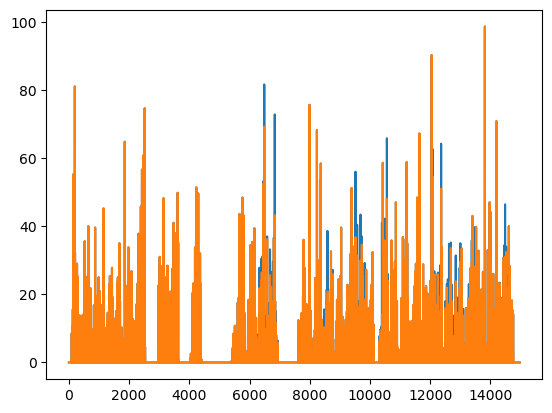

In [8]:
plt.plot(pre_1dy.pre.values)
plt.plot(pre_1dy.QCv1_Flag1.values)